In [ ]:
!pip install useful_rdkit_utils tqdm scikit-learn 'modAL-python>=0.4.1'


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.8/125.8 kB 10.7 MB/s eta 0:00:00


In [ ]:
!git clone https://github.com/meyresearch/ActiveLearning_BindingAffinity

Cloning into 'ActiveLearning_BindingAffinity'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 25 (delta 11), reused 6 (delta 3), pack-reused 0
Receiving objects: 100% (25/25), 255.89 KiB | 1.37 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [ ]:
file_path = '/content/ActiveLearning_BindingAffinity/TYK2_final.csv'
df = pd.read_csv(file_path)

In [ ]:
df

,SMILES,affinity,target,top_2p,top_5p
0,C=Cc1cc(c(c(c1)Cl)C(=O)Nc2cc(ncc2F)N)Cl,5.608397,TYK2,False,False
1,C=Cc1cc(c(c(c1)Cl)C(=O)Nc2cc(ncc2F)NC(=O)C3CC(...,7.972925,TYK2,False,False
2,C=Cc1cc(c(c(c1)Cl)C(=O)Nc2cc(ncc2F)NC(=O)C3CC(...,6.731267,TYK2,False,False
3,C=Cc1cc(c(c(c1)Cl)C(=O)Nc2cc(ncc2F)NC(=O)C3CC3...,7.653882,TYK2,False,False
4,C=Cc1cc(c(c(c1)Cl)C(=O)Nc2cc(ncc2F)NC(=O)C3CC3...,6.562022,TYK2,False,False
...,...,...,...,...,...
9992,c1cncnc1Nc2cc(c(cn2)F)NC(=O)c3c(cc(cc3Cl)CF)Cl,7.232871,TYK2,False,False
9993,c1cncnc1Nc2cc(c(cn2)F)NC(=O)c3c(cc(cc3Cl)CO)Cl,7.230769,TYK2,False,False
9994,c1cncnc1Nc2cc(c(cn2)F)NC(=O)c3c(cc(cc3Cl)Cl)Cl,7.756025,TYK2,False,False
9995,c1cncnc1Nc2cc(c(cn2)F)NC(=O)c3c(cc(cc3Cl)N)Cl,9.215634,TYK2,False,False


In [ ]:
'''
smiles to ecfp8 fingerprint
5k cross validation
'''

'\nsmiles to ecfp8 fingerprint\n5k cross validation\n'

In [ ]:
df['affinity']

0       5.608397
1       7.972925
2       6.731267
3       7.653882
4       6.562022
          ...   
9992    7.232871
9993    7.230769
9994    7.756025
9995    9.215634
9996    8.817224
Name: affinity, Length: 9997, dtype: float64

In [ ]:


# Initialize an empty list to store the fingerprints
fingerprints = []

# Iterate through each SMILES string in the 'SMILES' column
for smiles in df['SMILES']:
    # Convert SMILES to RDKit molecule object
    mol = Chem.MolFromSmiles(smiles)
    print(f'Mol {mol}')
    if mol is not None:  # Check if RDKit successfully converted the SMILES to a molecule
        # Generate ECFP fingerprint with radius 8 (ECFP8) and 1024 bits
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=4, nBits=1024)
        # Convert the fingerprint to a numpy array
        fp_array = np.zeros((0,), dtype=np.int8)
        AllChem.DataStructs.ConvertToNumpyArray(fp, fp_array)

        # Append the fingerprint array to the list of fingerprints
        fingerprints.append(fp_array)

# Convert the list of fingerprints to a numpy array
fingerprints_array = np.array(fingerprints)
print(f"fingerprints_array: {fingerprints_array}")
print(fingerprints_array.shape)  # Print the shape of the fingerprints array


Streaming output truncated to the last 5000 lines.
Mol <rdkit.Chem.rdchem.Mol object at 0x7d25ba024f90>
Mol <rdkit.Chem.rdchem.Mol object at 0x7d25ba025070>
Mol <rdkit.Chem.rdchem.Mol object at 0x7d25b94cd310>
Mol <rdkit.Chem.rdchem.Mol object at 0x7d25ba024f90>
Mol <rdkit.Chem.rdchem.Mol object at 0x7d25ba025070>
Mol <rdkit.Chem.rdchem.Mol object at 0x7d25b94cd310>
Mol <rdkit.Chem.rdchem.Mol object at 0x7d25ba024f90>
Mol <rdkit.Chem.rdchem.Mol object at 0x7d25ba025070>
Mol <rdkit.Chem.rdchem.Mol object at 0x7d25b94cd310>
Mol <rdkit.Chem.rdchem.Mol object at 0x7d25ba024f90>
Mol <rdkit.Chem.rdchem.Mol object at 0x7d25ba025070>
Mol <rdkit.Chem.rdchem.Mol object at 0x7d25b94cd310>
Mol <rdkit.Chem.rdchem.Mol object at 0x7d25ba024f90>
Mol <rdkit.Chem.rdchem.Mol object at 0x7d25ba025070>
Mol <rdkit.Chem.rdchem.Mol object at 0x7d25b94cd310>
Mol <rdkit.Chem.rdchem.Mol object at 0x7d25ba024f90>
Mol <rdkit.Chem.rdchem.Mol object at 0x7d25ba025070>
Mol <rdkit.Chem.rdchem.Mol object at 0x7d25b94cd

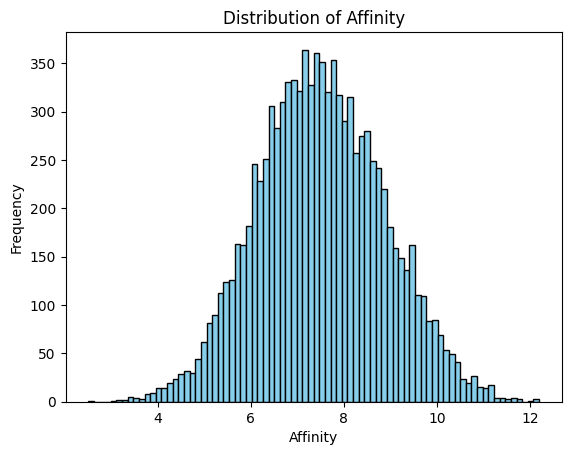

In [ ]:

# Plot histogram of the "affinity" column
plt.hist(df['affinity'], bins=80, color='skyblue', edgecolor='black')
plt.xlabel('Affinity')
plt.ylabel('Frequency')
plt.title('Distribution of Affinity')
plt.show()

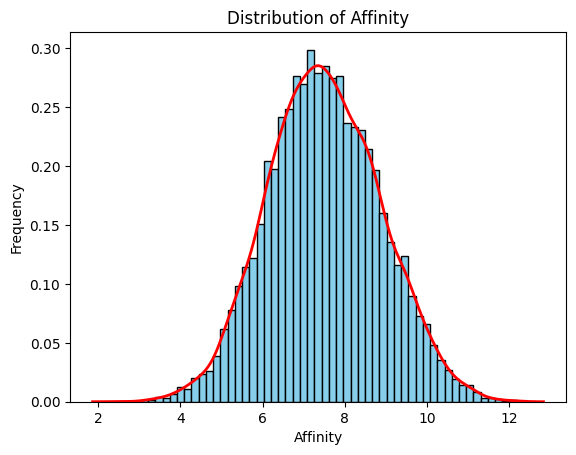

In [ ]:

# Plot histogram of the "affinity" column
plt.hist(df['affinity'], bins=55, color='skyblue', edgecolor='black', density=True)
plt.xlabel('Affinity')
plt.ylabel('Frequency')
plt.title('Distribution of Affinity')

# Add density curve
sns.kdeplot(df['affinity'], color='red', linewidth=2)

plt.show()


In [ ]:

# Calculate mean and standard deviation of "affinity" column
mean_affinity = df['affinity'].mean()
std_dev_affinity = df['affinity'].std()
variance = std_dev_affinity*std_dev_affinity
affinity = df['affinity']
print("Mean of Affinity:", mean_affinity)
print("Standard Deviation of Affinity:", std_dev_affinity)
print(f'Variance : {variance}')

Mean of Affinity: 7.505620454307984
Standard Deviation of Affinity: 1.3624007086939955
Variance : 1.8561356910499014


Text(0, 0.5, 'affinity')

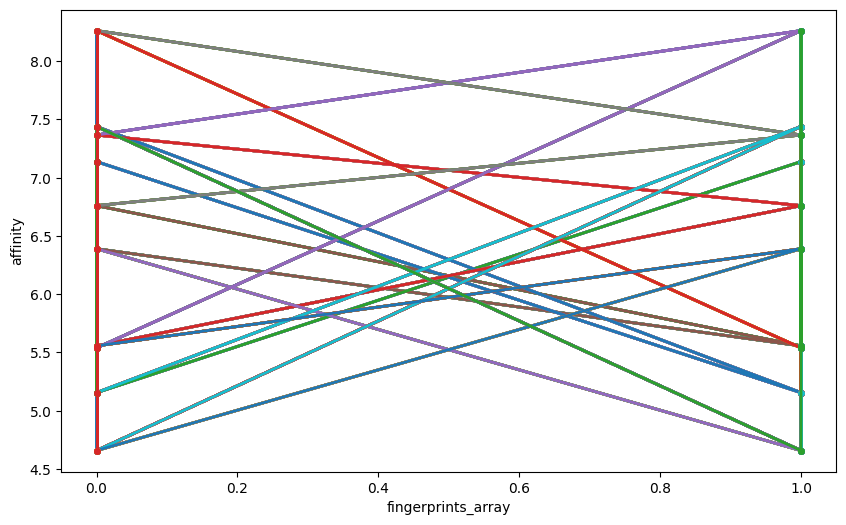

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

plt.clf()
plt.plot(fingerprints_array[100:110],affinity[100:110], '-o', linewidth=2, markersize=4)
plt.xlabel(r'fingerprints_array')
plt.ylabel(r'affinity')

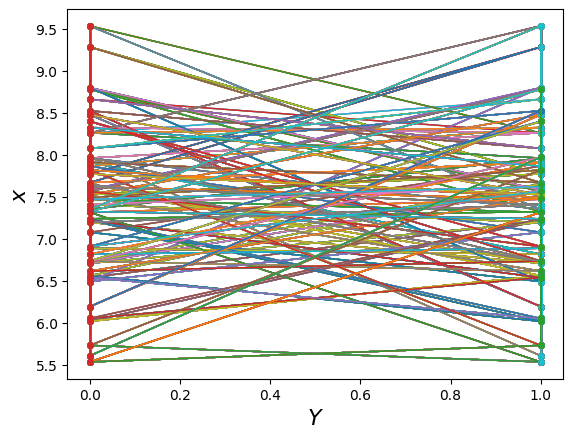

In [ ]:
plt.clf()
plt.plot(fingerprints_array[:50], affinity[:50], '-o', linewidth=1, markersize=3, markeredgewidth=2)

plt.xlabel(r'$Y$', fontsize = 16)
plt.ylabel(r'$x$', fontsize = 16)

# plt.show()
# plt.savefig('1d_random.png', bbox_inches='tight', dpi=600)
plt.savefig('random_x1_x20')

In [ ]:

# Assuming you have fingerprints_array and affinity arrays

# Create a dictionary with keys 'Fingerprint' and 'Affinity'
data_smiles = {'Fingerprint': [fingerprint.tolist() for fingerprint in fingerprints_array], 'Affinity': affinity}

# Convert the dictionary to a Pandas DataFrame
df_smiles = pd.DataFrame(data_smiles)

# Print the DataFrame to verify
print(df_smiles)


                                            Fingerprint  Affinity
0     [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  5.608397
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  7.972925
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  6.731267
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  7.653882
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  6.562022
...                                                 ...       ...
9992  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  7.232871
9993  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...  7.230769
9994  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  7.756025
9995  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  9.215634
9996  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  8.817224

[9997 rows x 2 columns]


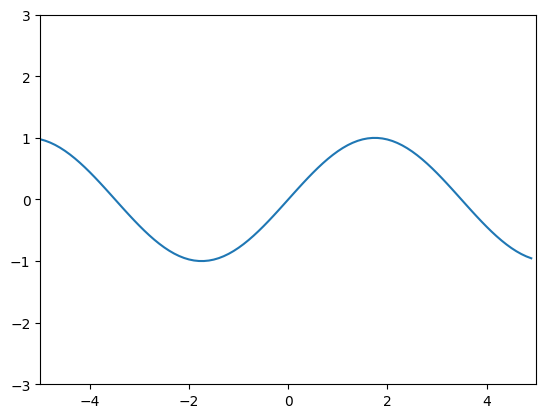

In [ ]:
# This is the true unknown function we are trying to approximate
f = lambda x: np.sin(0.9*x).flatten()
#f = lambda x: (0.25*(x**2)).flatten()
x = np.arange(-5, 5, 0.1)

plt.plot(x, f(x))
plt.axis([-5, 5, -3, 3])
plt.show()

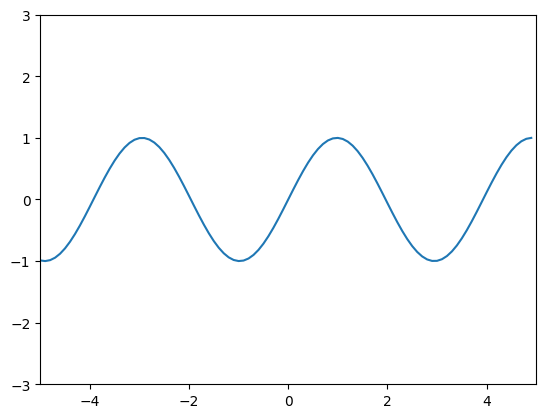

In [ ]:
# This is the true unknown function we are trying to approximate
f = lambda x: np.sin(1.6*x).flatten()
#f = lambda x: (0.25*(x**2)).flatten()
x = np.arange(-5, 5, 0.1)
plt.plot(x, f(x))
plt.axis([-5, 5, -3, 3])
plt.show()

In [ ]:
# Define the kernel
def kernel(a, b):
    kernelParameter_l = 0.1
    kernelParameter_sigma = 1.0
    sqdist = np.sum(a**2,axis=1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    # np.sum( ,axis=1) means adding all elements columnly; .reshap(-1, 1) add one dimension to make (n,) become (n,1)
    return kernelParameter_sigma*np.exp(-.5 * (1/kernelParameter_l) * sqdist)


# TANIMOATO

In [ ]:
#@title Sample some input points and noisy versions of the function evaluated at
# these points.
N = ## 20 ## len(df)         # number of existing observation points (training points).
n = ## 200  ##df(random.points from here)      # number of test points.
s = ## 0.00005    # variance from above code variance.

X = ##should be fingerprint      # N training points
y = ## Should be affinity

K = kernel(X, X)
L = np.linalg.cholesky(K + s*np.eye(N))     # line 1

# points we're going to make predictions at.
Xtest = np.linspace(-5, 5, n).reshape(-1,1) ## what is -5 to 5? need to check this out??

# compute the mean at our test points.
Lk = np.linalg.solve(L, kernel(X, Xtest))   # k_star = kernel(X, Xtest), calculating v := l\k_star
mu = np.dot(Lk.T, np.linalg.solve(L, y))    # \alpha = np.linalg.solve(L, y)

# compute the variance at our test points.
K_ = kernel(Xtest, Xtest)                  # k(x_star, x_star)
s2 = np.diag(K_) - np.sum(Lk**2, axis=0)
s = np.sqrt(s2)

# PLOTS:
plt.figure(1)
plt.clf()
plt.plot(X, y, 'k+', ms=18)
plt.plot(Xtest, f(Xtest), 'b-')
plt.gca().fill_between(Xtest.flat, mu-2*s, mu+2*s, color="#dddddd")
plt.plot(Xtest, mu, 'r--', lw=2)
#plt.savefig('predictive.png', bbox_inches='tight', dpi=300)
plt.title('Mean predictions plus 2 st.deviations')
plt.show()
#plt.axis([-5, 5, -3, 3])

SyntaxError: invalid syntax (<ipython-input-80-c810e4a59c5c>, line 3)

In [ ]:
!pip install gpytorch

In [ ]:
import math
import torch
import gpytorch
from matplotlib import pyplot as plt



In [ ]:
fingerprints_array

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int8)

In [ ]:
from sklearn.model_selection import train_test_split
train_x = torch.from_numpy(fingerprints_array).float()
train_y = torch.tensor(affinity.values)
train_y = train_y.to(torch.float32)
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.8, random_state=42)

In [ ]:
train_x.dtype

torch.float32

In [ ]:
affinity.dtype

dtype('float64')

In [ ]:
train_y = torch.tensor(affinity.values)
train_y.dtype

torch.float64

In [ ]:
# We will use the simplest form of GP model, exact inference
class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# initialize likelihood and model
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_x, train_y, likelihood)

In [ ]:
train_y = train_y.to(torch.float32)
train_y.dtype

torch.float32

In [ ]:
import torch
import gpytorch
from gpytorch.kernels import ScaleKernel, RBFKernel, LinearKernel

In [ ]:
test_y.shape

torch.Size([7998])

In [ ]:
# this is for running the notebook in our testing framework
import os
smoke_test = ('CI' in os.environ)
training_iter = 2 if smoke_test else 50


# Find optimal model hyperparameters
model.train()
likelihood.train()

# Use the adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)  # Includes GaussianLikelihood parameters

# "Loss" for GPs - the marginal log likelihood
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

for i in range(training_iter):
    # Zero gradients from previous iteration
    optimizer.zero_grad()
    # Output from model
    output = model(train_x)

  #  output = output.to(train_y.dtype)

    # Calc loss and backprop gradients
    loss = -mll(output, train_y)
    loss.backward()
    print('Iter %d/%d - Loss: %.3f   lengthscale: %.3f   noise: %.3f' % (
        i + 1, training_iter, loss.item(),
        model.covar_module.base_kernel.lengthscale.item(),
        model.likelihood.noise.item()
    ))
    optimizer.step()

RuntimeError: The size of tensor a (9997) must match the size of tensor b (1999) at non-singleton dimension 0

In [ ]:
# Get into evaluation (predictive posterior) mode
model.eval()
likelihood.eval()


GaussianLikelihood(
  (noise_covar): HomoskedasticNoise(
    (raw_noise_constraint): GreaterThan(1.000E-04)
  )
)

In [ ]:
# Test points are regularly spaced along [0,1]
# Make predictions by feeding model through likelihood
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    observed_pred = likelihood(model(test_x))

In [ ]:
f_preds = model(test_x)
y_preds = likelihood(model(test_x))

f_mean = f_preds.mean
f_var = f_preds.variance
f_covar = f_preds.covariance_matrix

In [ ]:
f_preds

MultivariateNormal(loc: torch.Size([6398]), covariance_matrix: torch.Size([6398, 6398]))

In [ ]:
f_mean

tensor([7.5445, 8.8520, 6.7731,  ..., 6.8266, 7.0323, 6.6787],
       grad_fn=<ViewBackward0>)

In [ ]:
f_var

tensor([1.3711, 1.5170, 1.1800,  ..., 1.5693, 1.5574, 1.5002],
       grad_fn=<ExpandBackward0>)

In [ ]:
f_covar

tensor([[ 1.3711e+00, -5.8647e-03,  2.0917e-03,  ..., -5.5811e-03,
         -1.1201e-02,  2.4107e-04],
        [-6.0173e-03,  1.5170e+00,  9.3701e-03,  ..., -4.6216e-03,
         -1.9454e-03, -7.5782e-03],
        [ 1.3148e-03,  1.0628e-02,  1.1800e+00,  ...,  1.5808e-03,
         -1.1463e-03,  5.8244e-02],
        ...,
        [-5.2075e-03, -4.6010e-03,  7.4734e-04,  ...,  1.5693e+00,
         -5.5774e-03,  5.3803e-03],
        [-1.1793e-02, -2.8578e-03,  8.8453e-05,  ..., -5.5468e-03,
          1.5574e+00,  9.4654e-04],
        [-3.7149e-04, -5.0534e-03,  5.9449e-02,  ...,  4.9784e-03,
         -1.0871e-03,  1.5002e+00]], grad_fn=<AddBackward0>)

In [ ]:
'''train_x = torch.from_numpy(fingerprints_array).float()
train_y = torch.tensor(affinity.values)
train_y = train_y.to(torch.float32)
'''

In [ ]:
test_y.dtype
train_x.shape,train_y.shape,test_x.shape,test_y.shape

(torch.Size([1599, 1024]),
 torch.Size([1599]),
 torch.Size([6398, 1024]),
 torch.Size([6398]))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
'''
train_x = train_x.float()
train_y = train_y.float()
test_x = test_x.float()
test_y = test_y.float()

'''
train_x, train_y,test_x, test_y

(tensor([[0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([ 7.6330,  7.6327,  5.4709,  7.4936,  7.7576,  7.9615,  7.0850,  6.4811,
          8.7834,  7.8056,  8.9129,  7.0487,  9.5172,  6.5939,  5.3918, 10.9344,
          4.9503,  5.3223,  7.7417,  6.8450,  9.8134,  7.0759,  5.8663,  9.7023,
          9.3768,  9.1965,  6.6207,  8.7771,  4.7532,  6.9482,  6.1650,  6.4268,
          8.3466,  8.3913,  6.4723,  6.4756,  7.5803,  7.7206,  5.1573,  6.4595,
          9.9327,  6.4215, 10.0967, 10.8718,  9.9228,  5.4160, 11.2222,  7.4626,
          5.7810,  8.5026,  8.2785,  5.1136,  8.3207,  5.4374,  9.6701,  5.9532,
          7.1519,  7.8668,  7.3038,  8.7005,  7.3660,  8.1536,  7.1724,  5.8882,
          6.4122,  6.5823,  6.7400,  8.1802,  9.0748,  8.8640,  6.4702,  3.4040,
         

In [ ]:
'''
for fold, (train_index, val_index) in enumerate(kf.split(train_x)):
    print(f"Fold: {fold+1}")
    print(f"Train indices: {train_index}")
    print(f"Validation indices: {val_index}")

    # Get the training and validation data for this fold
    fold_train_x, fold_val_x = train_x[train_index], train_x[val_index]
    fold_train_y, fold_val_y = train_y[train_index], train_y[val_index]

    print(f"Train X shape: {fold_train_x.shape}, Train Y shape: {fold_train_y.shape}")
    print(f"Validation X shape: {fold_val_x.shape}, Validation Y shape: {fold_val_y.shape}")

    '''

Fold: 1
Train indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  16  17  19
  20  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  39  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  57  59  60  61
  62  63  65  67  68  69  70  75  76  77  78  79  80  81  82  86  87  88
  89  90  91  94  95  96  97  98  99 100 102 103 104 105 107 109 110 111
 113 114 115 116 117 118 120 121 122 123 124 125 127 128 129 130 132 134
 135 136 137 138 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 155 156 157 158 161 163 164 165 166 167 168 169 170 171 173 175 177 178
 179 180 181 182 184 185 186 187 188 189 190 191 192 193 194 195 196 198
 199 201 202 203 206 207 208 209 210 211 212 214 215 216 217 218 221 223
 224 225 226 227 228 230 231 232 233 234 235 238 240 241 242 243 246 247
 249 250 252 253 254 255 256 257 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 278 279 280 281 282 283 284 285 286 288 290 291
 294 295 296 297 298 299 300

In [ ]:
%%time

import torch
from sklearn.model_selection import KFold
from gpytorch.models import ExactGP
from gpytorch.means import ConstantMean
from gpytorch.kernels import RBFKernel
from gpytorch.likelihoods import GaussianLikelihood
from gpytorch.mlls import ExactMarginalLogLikelihood
from sklearn.model_selection import train_test_split

# Convert features and target values to PyTorch tensors
train_x = torch.tensor(fingerprints_array, dtype=torch.float32)
train_y = torch.tensor(affinity.values, dtype=torch.float32)

# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.8, random_state=42)

# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)

# Define a custom Gaussian Process model
class GPRegressionModel(ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(GPRegressionModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = ConstantMean()
        self.covar_module = RBFKernel()

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

for fold, (train_index, val_index) in enumerate(kf.split(train_x)):
    print(f"Fold: {fold+1}")
    print(f"Train indices: {train_index}")
    print(f"Validation indices: {val_index}")

    # Get the training and validation data for this fold
    fold_train_x, fold_val_x = train_x[train_index], train_x[val_index]
    fold_train_y, fold_val_y = train_y[train_index], train_y[val_index]

    # Check the shapes of the training and validation data
    print(f"Fold_train_x shape: {fold_train_x.shape}")
    print(f"Fold_train_y shape: {fold_train_y.shape}")
    print(f"Fold_val_x shape: {fold_val_x.shape}")
    print(f"Fold_val_y shape: {fold_val_y.shape}")

    # Check the data types of training data
    print(f"Fold_train_x data type: {fold_train_x.dtype}")
    print(f"Fold_train_y data type: {fold_train_y.dtype}")

    # Initialize the likelihood
    likelihood = GaussianLikelihood()

    # Initialize the model
    model = GPRegressionModel(fold_train_x, fold_train_y, likelihood)

    # Check if the optimizer is being applied
    optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
    print(f"Optimizer: {optimizer}")

    # Verify the model components
    print(f"Mean module: {model.mean_module}")
    print(f"Covariance module: {model.covar_module}")
    print(f"Likelihood: {model.likelihood}")

    # Verify the training loop
    model.train()
    likelihood.train()
    for i in range(50):  # 50 training iterations
        optimizer.zero_grad()

        output = model(fold_train_x)

        loss = -mll(output, fold_train_y)
        loss.backward()
        print('Iter %d/%d - Loss: %.3f   lengthscale: %.3f   noise: %.3f' % (
        i + 1, training_iter, loss.item(),
        model.covar_module.base_kernel.lengthscale.item(),
        model.likelihood.noise.item() ))
        optimizer.step()

        # Check the output shape
       # print(f"Output shape: {output.shape}")

    # Evaluate on the validation set for this fold
    model.eval()
    with torch.no_grad():
        output_val = model(fold_val_x)
        val_loss = -mll(output_val, fold_val_y).item()
        print(f'Fold {fold + 1} Validation Loss: {val_loss}')


Fold: 1
Train indices: [   1    2    4 ... 1995 1997 1998]
Validation indices: [   0    3   10   11   16   25   26   30   31   34   38   40   53   70
   71   80   83   91   96   99  102  108  111  116  117  124  126  130
  134  135  137  138  143  146  150  151  152  155  161  169  171  186
  188  191  203  207  209  218  223  232  246  249  252  254  258  261
  263  272  276  281  282  283  286  288  294  298  310  311  314  318
  332  333  337  340  349  352  364  365  368  370  373  379  386  398
  400  404  407  421  428  449  450  452  460  462  469  489  492  496
  508  518  521  524  526  532  535  539  543  550  553  560  572  576
  579  580  581  586  591  592  596  598  611  612  617  625  627  638
  640  646  648  650  651  652  666  672  684  688  693  695  696  702
  713  718  719  739  740  741  744  748  751  752  755  757  759  761
  765  772  775  778  785  786  788  795  796  801  803  805  814  822
  833  840  850  854  856  860  865  867  869  873  874  876  894  90

AttributeError: 'RBFKernel' object has no attribute 'base_kernel'

In [ ]:
# @title this code works... don't change or delete anything from here
import torch
import gpytorch
from sklearn.model_selection import KFold
from gpytorch.models import ExactGP
from gpytorch.means import ConstantMean
from gpytorch.kernels import RBFKernel
from gpytorch.likelihoods import GaussianLikelihood
from gpytorch.mlls import ExactMarginalLogLikelihood
from sklearn.model_selection import train_test_split

# Convert features and target values to PyTorch tensors
train_x = torch.tensor(fingerprints_array, dtype=torch.float32)
train_y = torch.tensor(affinity.values, dtype=torch.float32)

# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.8, random_state=42)

# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)

# Define a custom Gaussian Process model
class GPRegressionModel(ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(GPRegressionModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = ConstantMean()
        self.covar_module = RBFKernel()

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

for fold, (train_index, val_index) in enumerate(kf.split(train_x)):
    print(f"Fold: {fold+1}")
    print(f"Train indices: {train_index}")
    print(f"Validation indices: {val_index}")

    # Get the training and validation data for this fold
    fold_train_x, fold_val_x = train_x[train_index], train_x[val_index]
    fold_train_y, fold_val_y = train_y[train_index], train_y[val_index]

    # Check the shapes of the training and validation data
    print(f"Fold_train_x shape: {fold_train_x.shape}")
    print(f"Fold_train_y shape: {fold_train_y.shape}")
    print(f"Fold_val_x shape: {fold_val_x.shape}")
    print(f"Fold_val_y shape: {fold_val_y.shape}")

    # Check the data types of training data
    print(f"Fold_train_x data type: {fold_train_x.dtype}")
    print(f"Fold_train_y data type: {fold_train_y.dtype}")

    # Initialize the likelihood
    likelihood = GaussianLikelihood()

    # Initialize the model
    model = GPRegressionModel(fold_train_x, fold_train_y, likelihood)

    # Check if the optimizer is being applied
    optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
    print(f"Optimizer: {optimizer}")

    # Verify the model components
    print(f"Mean module: {model.mean_module}")
    print(f"Covariance module: {model.covar_module}")
    print(f"Likelihood: {model.likelihood}")

    # Verify the training loop
    model.train()
    likelihood.train()
    mll = ExactMarginalLogLikelihood(likelihood, model)  # Create the MLL object
    for i in range(50):  # 50 training iterations
        optimizer.zero_grad()

        output = model(fold_train_x)

        loss = -mll(output, fold_train_y)
        loss.backward()
        print('Iter %d/50 - Loss: %.3f' % (i + 1, loss.item()))
        optimizer.step()

    # Evaluate on the validation set for this fold
    model.eval()
    likelihood.eval()
    with torch.no_grad():
        output_val = model(fold_val_x)
        val_loss = -mll(output_val, fold_val_y).item()
        print(f'Fold {fold + 1} Validation Loss: {val_loss}')


Fold: 1
Train indices: [   1    4    5 ... 1996 1997 1998]
Validation indices: [   0    2    3    7   23   25   36   38   43   45   46   70   77   81
   85   87   90   97  105  106  112  114  119  122  125  129  130  131
  132  137  147  158  162  175  179  183  189  191  206  207  208  209
  210  212  214  218  236  238  247  251  255  262  269  272  274  277
  278  281  285  289  305  320  321  324  330  331  334  336  341  343
  345  348  355  357  361  362  363  365  367  374  376  380  382  384
  386  389  395  397  401  408  409  410  412  419  420  422  423  426
  429  431  439  444  445  447  462  475  477  492  494  497  499  500
  503  508  510  521  522  526  538  543  547  550  559  560  562  566
  567  572  573  581  595  597  602  603  608  619  629  636  644  647
  656  662  665  666  667  668  669  670  672  683  684  685  694  695
  700  701  703  705  706  710  712  713  719  724  744  749  753  754
  757  763  764  776  785  790  793  808  811  837  849  864  865  87

# Run from here

In [2]:
#@title Installation
!pip install useful_rdkit_utils tqdm scikit-learn 'modAL-python>=0.4.1'
!pip install gpytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.1/266.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.6/175.6 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 4.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyl

In [3]:
#@title git clone repo
!git clone https://github.com/meyresearch/ActiveLearning_BindingAffinity

Cloning into 'ActiveLearning_BindingAffinity'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 25 (delta 11), reused 6 (delta 3), pack-reused 0
Receiving objects: 100% (25/25), 255.89 KiB | 10.24 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [4]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import torch
import gpytorch
from sklearn.model_selection import KFold
from gpytorch.models import ExactGP
from gpytorch.means import ConstantMean
from gpytorch.kernels import RBFKernel
from gpytorch.likelihoods import GaussianLikelihood
from gpytorch.mlls import ExactMarginalLogLikelihood
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import spearmanr

In [16]:
file_path = '/content/ActiveLearning_BindingAffinity/TYK2_final.csv'
df = pd.read_csv(file_path)

In [7]:
#@title code for converting SMILES into ECFP8
%%time
# Initialize an empty list to store the fingerprints
fingerprints = []

# Iterate through each SMILES string in the 'SMILES' column
for smiles in df['SMILES']:
    # Convert SMILES to RDKit molecule object
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:  # Check if RDKit successfully converted the SMILES to a molecule
        # Generate ECFP fingerprint with radius 8 (ECFP8) and 1024 bits
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=4, nBits=1024)
        # Convert the fingerprint to a numpy array
        fp_array = np.zeros((0,), dtype=np.int8)
        AllChem.DataStructs.ConvertToNumpyArray(fp, fp_array)

        # Append the fingerprint array to the list of fingerprints
        fingerprints.append(fp_array)

# Convert the list of fingerprints to a numpy array
fingerprints_array = np.array(fingerprints)
print(f"fingerprints_array: {fingerprints_array}")
print(fingerprints_array.shape)  # Print the shape of the fingerprints array


fingerprints_array: [[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]]
(9997, 1024)
CPU times: user 6.86 s, sys: 35.3 ms, total: 6.9 s
Wall time: 7.28 s


In [8]:

#@title Calculate mean and standard deviation of "affinity" column
mean_affinity = df['affinity'].mean()
std_dev_affinity = df['affinity'].std()
variance = std_dev_affinity*std_dev_affinity
affinity = df['affinity']

print("Mean of Affinity:", mean_affinity)
print("Standard Deviation of Affinity:", std_dev_affinity)
print(f'Variance : {variance}')

Mean of Affinity: 7.505620454307984
Standard Deviation of Affinity: 1.3624007086939955
Variance : 1.8561356910499014


In [9]:

# Assuming you have fingerprints_array and affinity arrays

# Create a dictionary with keys 'Fingerprint' and 'Affinity'
data_smiles = {'Fingerprint': [fingerprint.tolist() for fingerprint in fingerprints_array], 'Affinity': affinity}

# Convert the dictionary to a Pandas DataFrame
df_smiles = pd.DataFrame(data_smiles)

# Print the DataFrame to verify
print(df_smiles)


                                            Fingerprint  Affinity
0     [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  5.608397
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  7.972925
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  6.731267
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  7.653882
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  6.562022
...                                                 ...       ...
9992  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  7.232871
9993  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...  7.230769
9994  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  7.756025
9995  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  9.215634
9996  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  8.817224

[9997 rows x 2 columns]


In [ ]:
# Convert features and target values to PyTorch tensors
train_x = torch.tensor(fingerprints_array, dtype=torch.float32)
train_y = torch.tensor(affinity.values, dtype=torch.float32)

# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.8, random_state=42)

# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)

In [ ]:
# Define a custom Gaussian Process model
class GPRegressionModel(ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(GPRegressionModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = ConstantMean()
        self.covar_module = RBFKernel()

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

In [12]:
%%time

all_training_losses =[]

for fold, (train_index, val_index) in enumerate(kf.split(train_x)):
    print(f"Fold: {fold+1}")
    print(f"Train indices: {train_index}")
    print(f"Validation indices: {val_index}")

    # Get the training and validation data for this fold
    fold_train_x, fold_val_x = train_x[train_index], train_x[val_index]
    fold_train_y, fold_val_y = train_y[train_index], train_y[val_index]

    # Check the shapes of the training and validation data
    print(f"Fold_train_x shape: {fold_train_x.shape}")
    print(f"Fold_train_y shape: {fold_train_y.shape}")
    print(f"Fold_val_x shape: {fold_val_x.shape}")
    print(f"Fold_val_y shape: {fold_val_y.shape}")

    # Check the data types of training data
    print(f"Fold_train_x data type: {fold_train_x.dtype}")
    print(f"Fold_train_y data type: {fold_train_y.dtype}")

    # Initialize the likelihood
    likelihood = GaussianLikelihood()

    # Initialize the model
    model = GPRegressionModel(fold_train_x, fold_train_y, likelihood)

    # Check if the optimizer is being applied
    optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
    print(f"Optimizer: {optimizer}")

    # Verify the model components
    print(f"Mean module: {model.mean_module}")
    print(f"Covariance module: {model.covar_module}")
    print(f"Likelihood: {model.likelihood}")

    # Verify the training loop
    model.train()
    likelihood.train()
    mll = ExactMarginalLogLikelihood(likelihood, model)  # Create the MLL object
    training_losses = []
    epoch =100
    for i in range(epoch):
        optimizer.zero_grad()

        output = model(fold_train_x)

        loss = -mll(output, fold_train_y)
        loss.backward()

        print('Iter %d/%d - Loss: %.3f  noise: %.3f' % (
        i + 1, epoch,loss.item(),
        model.likelihood.noise.item() ))

        optimizer.step()

        # Store the training loss
        training_losses.append(loss.item())

        # Store the training losses of this fold
    all_training_losses.append(training_losses)

    # Evaluate on the validation set for this fold
    model.eval()
    likelihood.eval()
    with torch.no_grad():
        output_val = model(fold_val_x)
        val_loss = -mll(output_val, fold_val_y).item()
        print(f'Fold {fold + 1} Validation Loss: {val_loss}')


Fold: 1
Train indices: [   0    1    2 ... 1996 1997 1998]
Validation indices: [   5   19   31   36   42   44   51   57   61   62   77   81   84   98
  101  103  106  112  130  133  134  135  136  139  145  153  159  160
  161  172  174  177  178  182  184  193  208  215  221  223  228  232
  234  235  236  249  256  257  261  262  263  266  267  275  277  280
  285  300  302  305  314  319  333  334  338  339  342  343  352  356
  364  365  376  385  387  388  389  394  395  397  398  402  404  406
  411  413  418  429  432  440  441  445  456  462  466  467  468  477
  487  488  493  499  500  507  509  512  514  521  523  530  532  539
  541  550  552  554  566  574  577  583  585  588  590  598  604  605
  607  609  613  624  627  632  637  645  650  652  655  658  664  665
  669  671  675  676  681  685  686  689  696  699  702  709  714  717
  718  730  739  743  745  746  748  752  761  764  770  771  773  774
  783  791  792  795  798  805  806  807  827  828  841  848  850  85

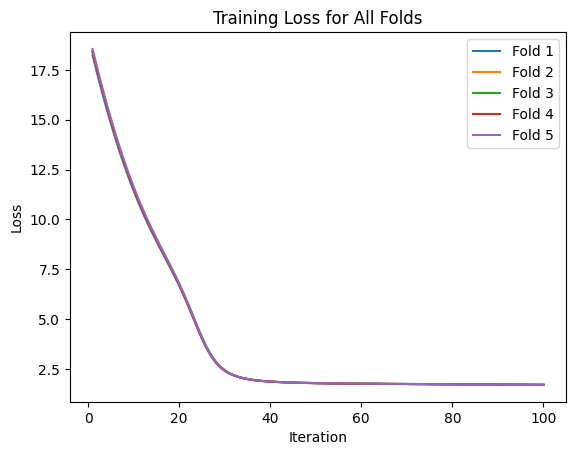

In [18]:
# Plotting all training loss curves on a single plot
plt.figure()
for i, training_losses in enumerate(all_training_losses):
    plt.plot(range(1, epoch+1), training_losses, label=f'Fold {i+1}')

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss for All Folds')
plt.legend()
plt.show()

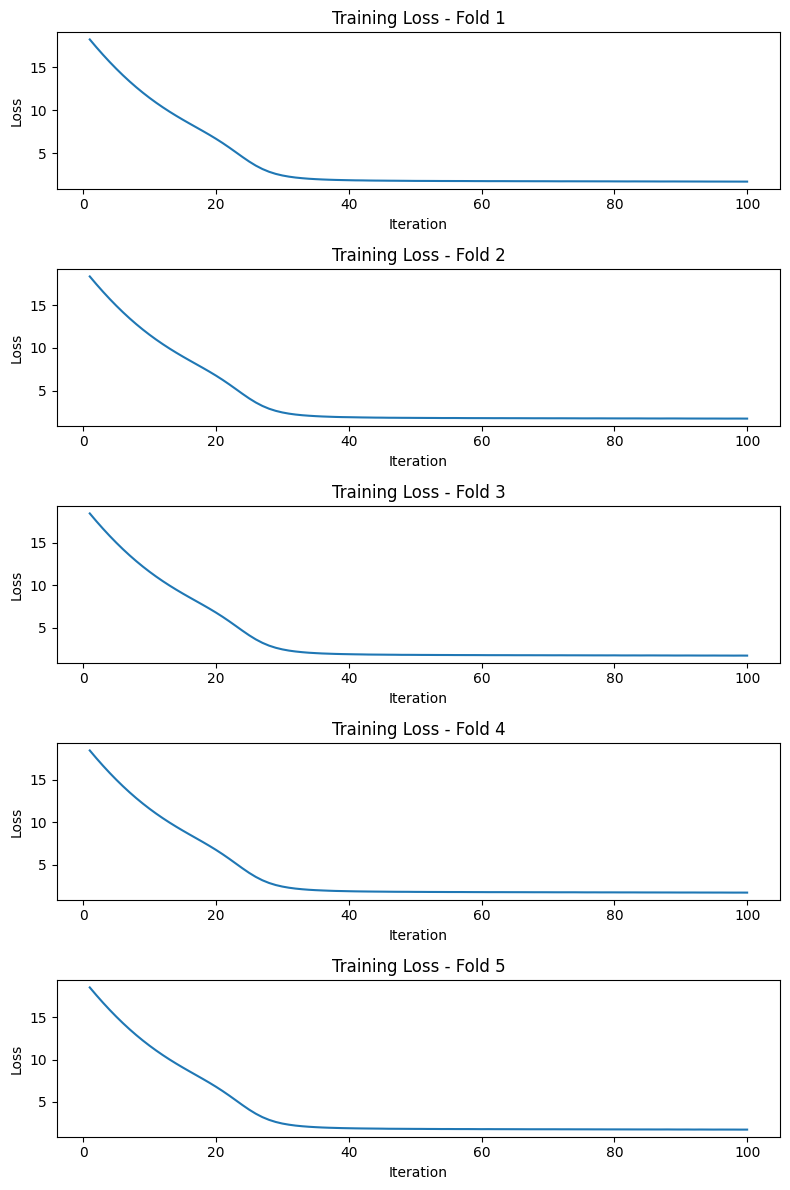

In [20]:
# Plotting training loss curves for all folds in subplots
fig, axs = plt.subplots(5, 1, figsize=(8, 12))
for i, training_losses in enumerate(all_training_losses):
    axs[i].plot(range(1, epoch+1), training_losses)
    axs[i].set_xlabel('Iteration')
    axs[i].set_ylabel('Loss')
    axs[i].set_title(f'Training Loss - Fold {i+1}')

plt.tight_layout()
plt.show()

In [ ]:
%%time
# Initialize lists to store evaluation metrics
r2_scores = []
spearman_correlations = []
recall_top2_percent = []
recall_top5_percent = []

for fold, (train_index, val_index) in enumerate(kf.split(train_x)):
    # Get the training and validation data for this fold
    fold_train_x, fold_val_x = train_x[train_index], train_x[val_index]
    fold_train_y, fold_val_y = train_y[train_index], train_y[val_index]

    # Initialize the likelihood
    likelihood = GaussianLikelihood()

    # Initialize the model
    model = GPRegressionModel(fold_train_x, fold_train_y, likelihood)

    # Verify the training loop
    model.train()
    likelihood.train()
    mll = ExactMarginalLogLikelihood(likelihood, model)  # Create the MLL object
    epoch = 50
    for i in range(epoch):  # 50 training iterations
        optimizer.zero_grad()

        output = model(fold_train_x)

        loss = -mll(output, fold_train_y)
        loss.backward()

        print('Iter %d/%d - Loss: %.3f  noise: %.3f' % (
        i + 1, epoch,loss.item(),
        model.likelihood.noise.item() ))

        optimizer.step()

    # Evaluate on the validation set for this fold
    model.eval()
    likelihood.eval()
    with torch.no_grad():
        output_val = model(fold_val_x)
        val_loss = -mll(output_val, fold_val_y).item()

        # Calculate R2
        r2 = r2_score(fold_val_y.cpu().numpy(), output_val.mean.cpu().numpy())
        r2_scores.append(r2)

        # Calculate Spearman correlation coefficient
        spearman_corr, _ = spearmanr(fold_val_y.cpu().numpy(), output_val.mean.cpu().numpy())
        spearman_correlations.append(spearman_corr)

# Calculate Recall for top 2% and 5% samples across all test sets
model.eval()
likelihood.eval()
with torch.no_grad():
    output_test = model(test_x)
    predictions = output_test.mean.cpu().numpy()

    # Calculate Recall for top 2% and 5% samples
    top_2_percent = int(0.02 * len(predictions))
    top_5_percent = int(0.05 * len(predictions))

    # Sort predictions and get indices of top 2% and 5% samples
    top_2_indices = np.argsort(predictions)[-top_2_percent:]
    top_5_indices = np.argsort(predictions)[-top_5_percent:]

    # Calculate Recall for top 2% and 5% samples
    recall_2_percent = np.sum(test_y.cpu().numpy()[top_2_indices]) / np.sum(test_y.cpu().numpy())
    recall_5_percent = np.sum(test_y.cpu().numpy()[top_5_indices]) / np.sum(test_y.cpu().numpy())

# Print the evaluation metrics
print(f"Mean R2 Score: {np.mean(r2_scores)}")
print(f"Mean Spearman Correlation Coefficient: {np.mean(spearman_correlations)}")
print(f"Recall of Top 2% Samples: {recall_2_percent}")
print(f"Recall of Top 5% Samples: {recall_5_percent}")


Iter 1/50 - Loss: 18.252  noise: 0.693
Iter 2/50 - Loss: 18.252  noise: 0.693
Iter 3/50 - Loss: 18.252  noise: 0.693
Iter 4/50 - Loss: 18.252  noise: 0.693
Iter 5/50 - Loss: 18.252  noise: 0.693
Iter 6/50 - Loss: 18.252  noise: 0.693
Iter 7/50 - Loss: 18.252  noise: 0.693
Iter 8/50 - Loss: 18.252  noise: 0.693
Iter 9/50 - Loss: 18.252  noise: 0.693
Iter 10/50 - Loss: 18.252  noise: 0.693
Iter 11/50 - Loss: 18.252  noise: 0.693
Iter 12/50 - Loss: 18.252  noise: 0.693
Iter 13/50 - Loss: 18.252  noise: 0.693
Iter 14/50 - Loss: 18.252  noise: 0.693
Iter 15/50 - Loss: 18.252  noise: 0.693
Iter 16/50 - Loss: 18.252  noise: 0.693
Iter 17/50 - Loss: 18.252  noise: 0.693
Iter 18/50 - Loss: 18.252  noise: 0.693
Iter 19/50 - Loss: 18.252  noise: 0.693
Iter 20/50 - Loss: 18.252  noise: 0.693
Iter 21/50 - Loss: 18.252  noise: 0.693
Iter 22/50 - Loss: 18.252  noise: 0.693
Iter 23/50 - Loss: 18.252  noise: 0.693
Iter 24/50 - Loss: 18.252  noise: 0.693
Iter 25/50 - Loss: 18.252  noise: 0.693
Iter 26/5